In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [2]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4]:
scaled_df =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.index = df.index
scaled_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
Mazda RX4 Wag,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
Datsun 710,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
Hornet 4 Drive,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
Hornet Sportabout,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857


In [5]:
from sklearn.cluster import KMeans

In [6]:
error = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    df["k={} label".format(i)] = kmeans.fit_predict(scaled_df)
    error.append(kmeans.inertia_)

In [7]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,...,k=10 label,k=11 label,k=12 label,k=13 label,k=14 label,k=15 label,k=16 label,k=17 label,k=18 label,k=19 label
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,...,4,7,5,6,0,5,3,2,9,11
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,...,4,7,5,6,0,5,3,2,9,11
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,...,3,2,1,3,11,1,10,0,1,7
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,...,5,4,6,0,1,7,4,7,11,5
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,...,8,0,3,1,2,4,1,1,15,18
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,...,5,4,6,0,1,7,4,7,11,5
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,...,8,8,8,10,7,13,14,11,0,12
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,...,1,5,4,8,6,3,0,5,13,3
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,...,1,5,4,8,6,3,0,5,13,16
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,...,6,3,7,7,5,11,9,3,2,9


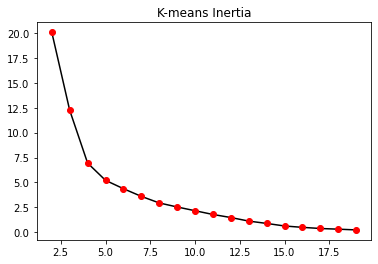

In [8]:
plt.plot(range(2,20), error, color = "black", zorder = 0)
plt.scatter(x = range(2,20), y = error, color = "red", zorder = 1)
plt.title("K-means Inertia");

In [9]:
cdict = {0:"red",
         1:"green",
         2:"blue",
         3:'purple',
         4:'black'}

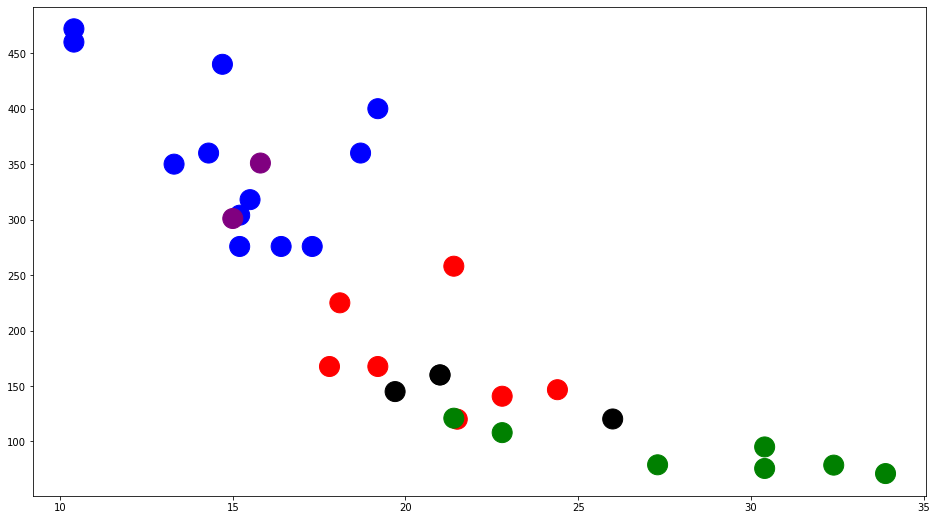

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(df['mpg'], df['disp'], s = 400, color = df['k=5 label'].apply(lambda x: cdict[x]));

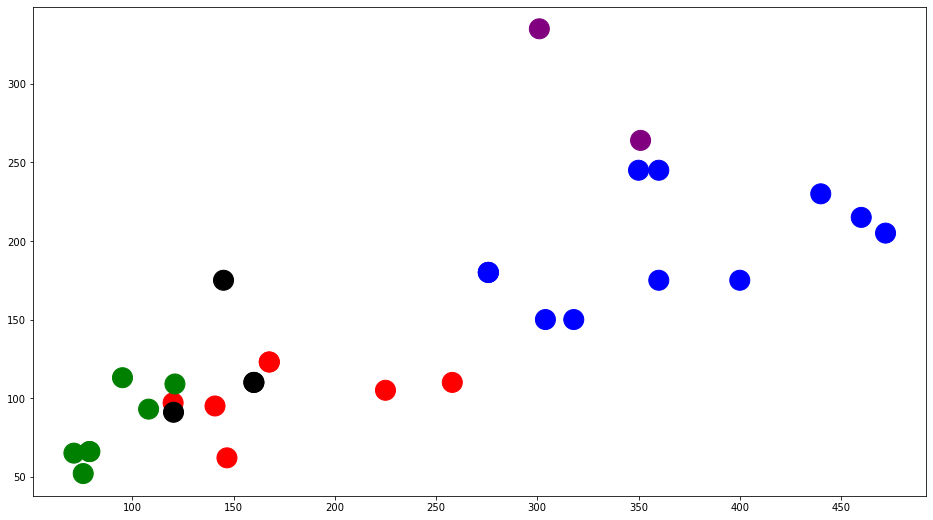

In [11]:
plt.figure(figsize=(16,9))
plt.scatter(df['disp'], df['hp'], s = 400, color = df['k=5 label'].apply(lambda x: cdict[x]));

In [19]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

scaled_df =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.index = df.index


kmeans = KMeans(n_clusters=5)
df["label"] = kmeans.fit_predict(scaled_df)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,label
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


In [27]:
df.groupby('label').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,7.0,28.371429,4.757701,21.4,25.050,30.4,31.400,33.9
1,12.0,15.050000,2.774396,10.4,14.050,15.2,16.625,19.2
2,2.0,15.400000,0.565685,15.0,15.200,15.4,15.600,15.8
3,7.0,20.742857,2.471071,17.8,18.650,21.4,22.150,24.4
4,4.0,21.925000,2.784930,19.7,20.675,21.0,22.250,26.0


In [28]:
df.groupby('label').describe()['disp']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,7.0,89.800000,18.802128,71.1,77.200,79.0,101.55,121.0
1,12.0,357.616667,71.823494,275.8,296.950,355.0,410.00,472.0
2,2.0,326.000000,35.355339,301.0,313.500,326.0,338.50,351.0
3,7.0,175.114286,49.130725,120.1,143.750,167.6,196.30,258.0
4,4.0,146.325000,18.735594,120.3,138.825,152.5,160.00,160.0


In [29]:
df.groupby('label').describe()['hp']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,7.0,80.571429,24.144407,52.0,65.50,66.0,101.00,113.0
1,12.0,194.166667,33.359838,150.0,175.00,180.0,218.75,245.0
2,2.0,299.500000,50.204581,264.0,281.75,299.5,317.25,335.0
3,7.0,102.142857,20.931862,62.0,96.00,105.0,116.50,123.0
4,4.0,121.500000,36.774085,91.0,105.25,110.0,126.25,175.0


In [30]:
df.groupby('label').describe()['wt']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,7.0,2.028286,0.440084,1.513,1.7250,1.935,2.26000,2.780
1,12.0,4.104083,0.768307,3.435,3.5575,3.810,4.36500,5.424
2,2.0,3.370000,0.282843,3.170,3.2700,3.370,3.47000,3.570
3,7.0,3.194286,0.347760,2.465,3.1700,3.215,3.44000,3.460
4,4.0,2.601250,0.324817,2.140,2.5000,2.695,2.79625,2.875
